<a href="https://colab.research.google.com/github/SilentSierra/DissDataAnalysis/blob/main/Representation_of_Women_in_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import requests
import io
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [86]:
raw_data_url = "https://raw.githubusercontent.com/SilentSierra/DissDataAnalysis/main/Representation_of_Women.csv"
def load_rep_data(url=raw_data_url):
  # download the csv file from github
  download = requests.get(url).content

  # read the downloaded content and put into dataframe
  df = pd.read_csv(io.StringIO(download.decode("utf-8")),index_col=0,infer_datetime_format=True,dayfirst=False, dtype={'ID': 'int', "Gender": 'string', 'Age': 'string', 'Country': 'string', 'How often movies': 'string', 'How often games':'string', 'Wome in media important':'string', 'Use Bechdel before':'string', 'Is Bechdel good?': 'string', 'Modifications on Bechdel':'string', 'Strength':'string', 'Historical context':'string', 'Representation changed':'string'})
  return df

In [87]:
rep_data = load_rep_data()

In [88]:
rep_data.head()

,Gender,Age,Country,How_often_movies\r\n,How often games\r\n,Women in media important\r\n,Use Bechdel before,Is Bechdel good\r\n,Modifications on Bechdel,Strength,Historical context,Representation changed
ID,,,,,,,,,,,,
1,Woman,23-27,United Kingdom,At least once a week,At least once a day,Moderately important,No,No,Yes,Yes,Historical accuracy/context can justify a lack...,Yes
2,Man,18 - 23,Romania,At least once a week,At least once a day,Quite important,No,No,Yes,Yes,Historical accuracy/context can justify a lack...,Yes
3,Man,24-29,United Kingdom,At least once a week,At least once a day,Very important,"Yes, I have heard of it before",Yes,No,Yes,Historical accuracy/context can justify a lack...,Yes
4,Man,36-41,Croatia,At least once a year,At least once a day,Quite important,"Yes, I have heard of and used it before",No,Other (please clarify in Question 14 below),No,Historical accuracy/context can justify a lack...,Yes
5,Genderfluid between non-binary and male,18 - 23,United Kingdom,At least once a day,At least once a day,Very important,"Yes, I have heard of and used it before",Other (please clarify in Question 12 below),Other (please clarify in Question 14 below),Yes,Historical accuracy/context can justify a lack...,Yes


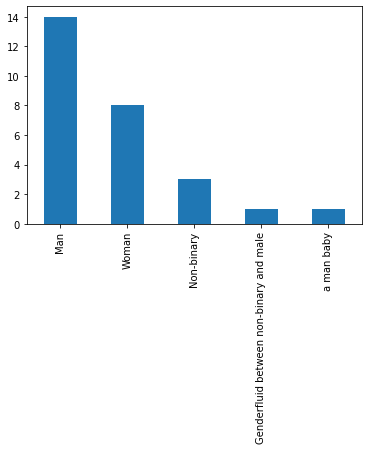

In [89]:
genderpie = rep_data.groupby(['Gender'])['Gender'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(genderpie, values='count', names='Gender', title='Participant gender')
fig.show()

rep_data['Gender'].value_counts(sort=False).plot(kind='bar', x = "gender", y = "frequency")

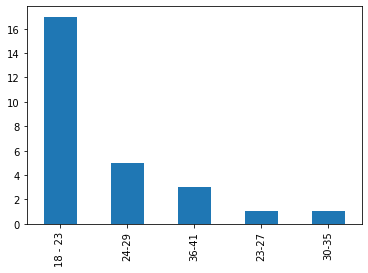

In [90]:
agepie = rep_data.groupby(['Age'])['Age'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(agepie, values='count', names='Age', title='Participant age')
fig.show()

rep_data['Age'].value_counts(sort=False).plot(kind='bar', x = "age", y = "frequency")

In [91]:
#import pandas
#from collections import Counter
#agecount = Counter(rep_data['Age'])
#df = pandas.DataFrame.from_dict(agecount, orient='index')
#df.plot(kind='bar')
#rep_data['Age'].value_counts(sort=False).plot(kind='bar', x = "age", y = "frequency")

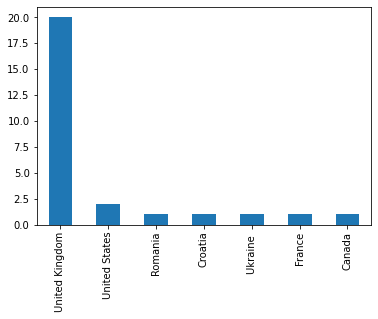

In [92]:
agepie = rep_data.groupby(['Country'])['Country'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(agepie, values='count', names='Country', title='Participant country')
fig.show()

rep_data['Country'].value_counts(sort=False).plot(kind='bar', x = "country", y = "frequency")

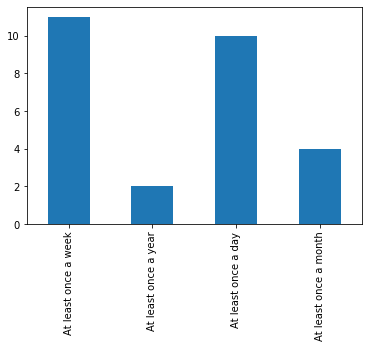

In [95]:
moviepie = rep_data.groupby(['How_often_movies\r\n'])['How_often_movies\r\n'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(moviepie, values='count', names='How_often_movies\r\n', title='How often participants watch movies/TV')
fig.show()

rep_data['How_often_movies\r\n'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

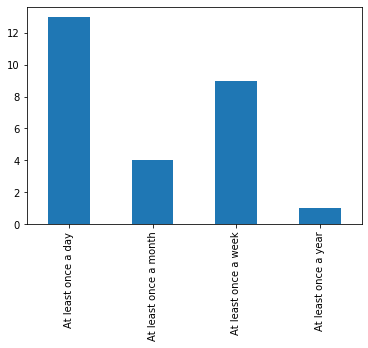

In [97]:
gamespie = rep_data.groupby(['How often games\r\n'])['How often games\r\n'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(gamespie, values='count', names='How often games\r\n', title='How often participants play video games')
fig.show()

rep_data['How often games\r\n'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

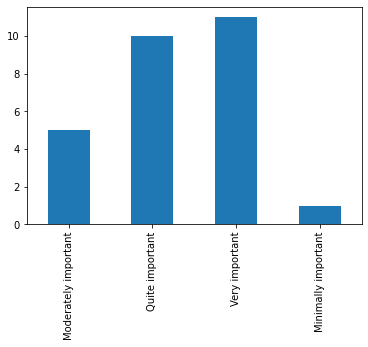

In [99]:
womenimportantpie = rep_data.groupby(['Women in media important\r\n'])['Women in media important\r\n'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Women in media important\r\n', title='Whether participants considered representation of women in media to be important')
fig.show()

rep_data['Women in media important\r\n'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

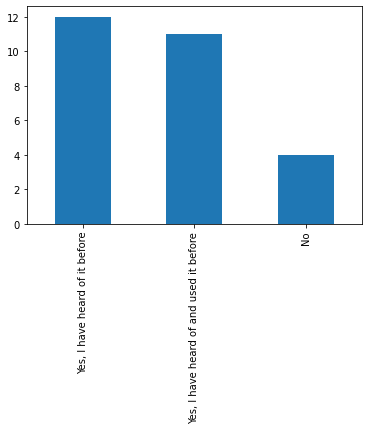

In [100]:
womenimportantpie = rep_data.groupby(['Use Bechdel before'])['Use Bechdel before'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Use Bechdel before', title='Whether participants have used the Bechdel test before')
fig.show()

rep_data['Use Bechdel before'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

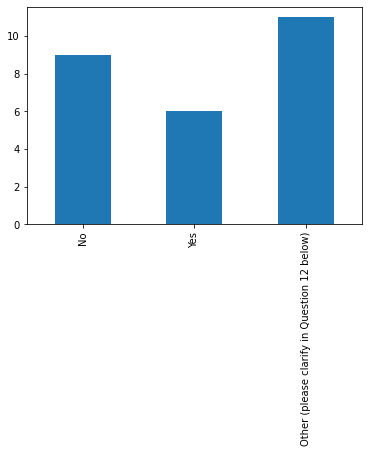

In [104]:
womenimportantpie = rep_data.groupby(['Is Bechdel good\r\n'])['Is Bechdel good\r\n'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Is Bechdel good\r\n', title='Whether participants consider the Bechdel test to be effective')
fig.show()

rep_data['Is Bechdel good\r\n'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

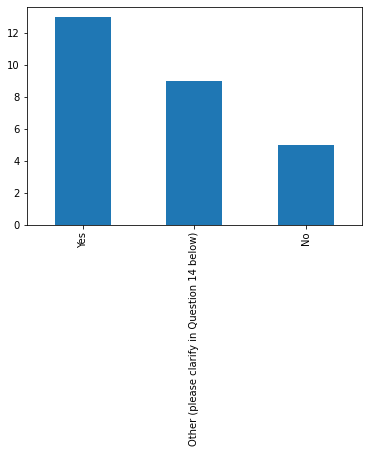

In [106]:
womenimportantpie = rep_data.groupby(['Modifications on Bechdel'])['Modifications on Bechdel'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Modifications on Bechdel', title='Whether participants consider modifications/additions to the Bechdel test would improve it')
fig.show()

rep_data['Modifications on Bechdel'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

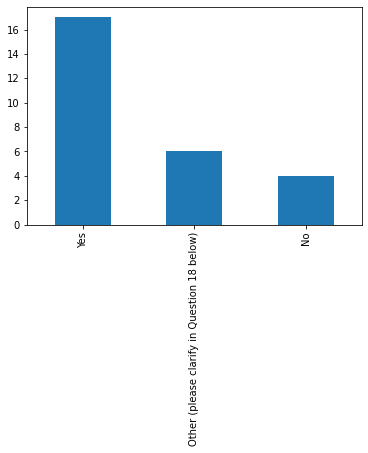

In [108]:
womenimportantpie = rep_data.groupby(['Strength'])['Strength'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Strength', title='Whether participants consider "strength" to be tied to specific character traits')
fig.show()

rep_data['Strength'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

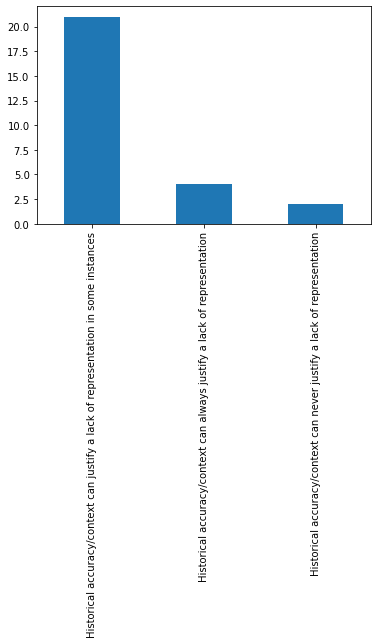

In [109]:
womenimportantpie = rep_data.groupby(['Historical context'])['Historical context'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Historical context', title='Whether participants consider historical context to justify a lack of representation')
fig.show()

rep_data['Historical context'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

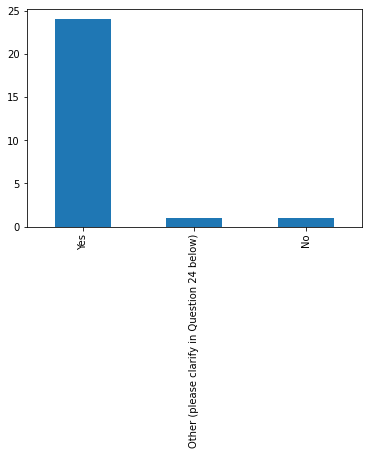

In [110]:
womenimportantpie = rep_data.groupby(['Representation changed'])['Representation changed'].count().reset_index(name = 'count')
import plotly.express as px
fig = px.pie(womenimportantpie, values='count', names='Representation changed', title='Whether participants think a characters representation can be changed over time')
fig.show()

rep_data['Representation changed'].value_counts(sort=False).plot(kind='bar', x = "", y = "frequency")

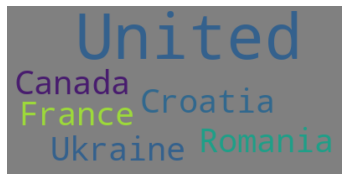

In [134]:
from wordcloud import WordCloud
#rep_data['Country'].isna().sum()
#rep_data['Country'].dropna(inplace = True)
text = " ".join(cat.split()[0] for cat in rep_data['Country'])
word_cloud = WordCloud(collocations = False, background_color = 'gray').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()